# Introduction:
Supermarkets often change their store layouts, product selections, prices and promotions. As part of the Quantium retail analytics team, the goal of this project is to evaluate and analyse the performance of change and recommend whether it has been successful. We will be looking at the Chips Category for retail stores across 1 year

## Goal:
The insights from the analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.
## Part 2:
This notebook is to help the Category Mangager for Chips test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("QVI_data.csv")
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
data.shape

(264834, 12)

In [4]:
data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [5]:
data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data = data.drop_duplicates()

In [8]:
data.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [9]:
data['STORE_NBR'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

- 272 Diff stores
- Trial Stores = 77,86 and 88
- Control Store = ??

### Find the control store by looking at the performances of each Store:
- Metrics:
    - Monthly overall sales revenue
    - Monthly Number of Customers
    - Monthly Number of transactions per customer

In [10]:

data['DATE'] = pd.to_datetime(data['DATE'])
data.dtypes

LYLTY_CARD_NBR               int64
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [11]:
#Range of dates
data['DATE'].describe()

C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3371578823.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['DATE'].describe()


count                  264833
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [12]:
#Remove the trial period - This will be our test
# Date Range: Start of July 2018 to end of Jan
data = data.sort_values(by='DATE', ascending=True)

In [13]:
select_data = data[data['DATE'] < '2019-01-01 00:00:00']

In [14]:
#Fill in the missing stores data: 92 and 193

#Copy data from store 91
store_92_data = select_data[select_data['STORE_NBR'] == 91].copy()
store_92_data['STORE_NBR'] = 92

#Concatenate with the original dataframe
select_data = pd.concat([select_data, store_92_data], ignore_index=True)

In [15]:
#Store 193

#Copy data from store 91
store_193_data = select_data[select_data['STORE_NBR'] == 91].copy()
store_193_data['STORE_NBR'] = 193

#Concatenate with the original dataframe
select_data = pd.concat([select_data, store_193_data], ignore_index=True)

In [16]:
#Set all store 92 and 193 values to null
select_data.loc[(select_data[select_data['STORE_NBR'] == 92]).index, select_data.columns != 'STORE_NBR'] = None


In [17]:
#Store 193 to null
select_data.loc[(select_data[select_data['STORE_NBR'] == 193]).index, select_data.columns != 'STORE_NBR'] = None


In [19]:
select_data['DATE'].describe()

C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\4158307912.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  select_data['DATE'].describe()


count                  133689
unique                    183
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2018-12-31 00:00:00
Name: DATE, dtype: object

In [21]:
#Function for obtaining feature engineered metrics
def store_metrics(STORE_NBR):
    print(STORE_NBR)
    store = select_data[select_data['STORE_NBR'] == STORE_NBR]

    #Monthly Overall Sales
    mnth_sale = store.groupby(store['DATE'].dt.month)['TOT_SALES'].sum()
    mnth_sales_arr.append(mnth_sale)

    #Monthly Number of Customers
    mnth_cust = store.groupby(store['DATE'].dt.month)['LYLTY_CARD_NBR'].size()
    mnth_cust_arr.append(mnth_cust)

    #Monthly Number of Transactions per cust
    mnth_avg_trns = ((store.groupby(store['DATE'].dt.month)['LYLTY_CARD_NBR'].value_counts()))
    mnth_avg_trns = pd.DataFrame(mnth_avg_trns)
    mnth_avg_trns = mnth_avg_trns.rename(columns={'LYLTY_CARD_NBR':'count'})
    mnth_avg_trns = mnth_avg_trns.reset_index()
    mnth_avg_trns = mnth_avg_trns.groupby(mnth_avg_trns['DATE'])['count'].mean() #Average transactions of store X per month
    mnth_avg_trns_arr.append(mnth_avg_trns)

In [22]:
stores = select_data['STORE_NBR'].unique()
stores = np.sort(stores)

mnth_sales_arr = []
mnth_cust_arr = []
mnth_avg_trns_arr = []

for store in stores:
    print("Store: ", store)
    store_metrics(store)



Store:  1
1
Store:  2
2
Store:  3
3
Store:  4
4
Store:  5
5
Store:  6
6
Store:  7
7
Store:  8
8
Store:  9
9
Store:  10
10
Store:  11
11
Store:  12
12
Store:  13
13
Store:  14
14
Store:  15
15
Store:  16
16
Store:  17
17
Store:  18
18
Store:  19
19
Store:  20
20
Store:  21
21
Store:  22
22
Store:  23
23
Store:  24
24
Store:  25
25
Store:  26
26
Store:  27
27
Store:  28
28
Store:  29
29
Store:  30
30
Store:  31
31
Store:  32
32
Store:  33
33
Store:  34
34
Store:  35
35
Store:  36
36
Store:  37
37
Store:  38
38
Store:  39
39
Store:  40
40
Store:  41
41
Store:  42
42
Store:  43
43
Store:  44
44
Store:  45
45
Store:  46
46
Store:  47
47
Store:  48
48
Store:  49
49
Store:  50
50
Store:  51
51
Store:  52
52
Store:  53
53
Store:  54
54
Store:  55
55
Store:  56
56
Store:  57
57
Store:  58
58
Store:  59
59
Store:  60
60
Store:  61
61
Store:  62
62
Store:  63
63
Store:  64
64
Store:  65
65
Store:  66
66
Store:  67
67
Store:  68
68
Store:  69
69
Store:  70
70
Store:  71
71
Store:  72
72
Store:  73

Store:  156
156
Store:  157
157
Store:  158
158
Store:  159
159
Store:  160
160
Store:  161
161
Store:  162
162
Store:  163
163
Store:  164
164
Store:  165
165
Store:  166
166
Store:  167
167
Store:  168
168
Store:  169
169
Store:  170
170
Store:  171
171
Store:  172
172
Store:  173
173
Store:  174
174
Store:  175
175
Store:  176
176
Store:  177
177
Store:  178
178
Store:  179
179
Store:  180
180
Store:  181
181
Store:  182
182
Store:  183
183
Store:  184
184
Store:  185
185
Store:  186
186
Store:  187
187
Store:  188
188
Store:  189
189
Store:  190
190
Store:  191
191
Store:  192
192
Store:  193
193
Store:  194
194
Store:  195
195
Store:  196
196
Store:  197
197
Store:  198
198
Store:  199
199
Store:  200
200
Store:  201
201
Store:  202
202
Store:  203
203
Store:  204
204
Store:  205
205
Store:  206
206
Store:  207
207
Store:  208
208
Store:  209
209
Store:  210
210
Store:  211
211
Store:  212
212
Store:  213
213
Store:  214
214
Store:  215
215
Store:  216
216
Store:  217
217
Store:  

In [23]:
stores

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

- Missing Stores 92 and 193
    - Resolved

- Have to get Control Stores for each Trial Store
    - Since the Trial stores are not similar

## Finding Similar Scores:
- Using Cosine Similarity
    - Getting similarity of stores between the two store vectors of integers (based on the metrics obtained above). The cosine similarity ranges from -1 to 1, where a value of 1 indicates perfect similarity and a value of -1 indicates complete dissimilarity.
- Magnitude difference:
    - The actual difference between the stores. magnitude difference can reflect the overall scale or significance of a metric for a particular store.

### Total Sales Similarity

In [28]:
#Cosine Similarity between test stores to find the best control stores
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
def cosine_sim_scores(x_store_sales,x_store_customers,x_store_avg_trans):

    for i in range(len(all_metric_df)):
        sales     = all_metric_df.iloc[i, [0, 1, 2, 3, 4, 5]].values
        customers = all_metric_df.iloc[i, [6, 7, 8, 9, 10, 11]].values
        avg_trans = all_metric_df.iloc[i, [12, 13, 14, 15, 16, 17]].values

        
        
        # Calculate cosine similarity between store X and the current store
        score_sales = cosine_similarity([x_store_sales], [sales])[0][0]
        score_customers = cosine_similarity([x_store_customers], [customers])[0][0]
        score_avg_trans = cosine_similarity([x_store_avg_trans], [avg_trans])[0][0]
        
        # Combine the similarity scores (you can use a weighted sum if desired)
        score = score_sales + score_customers + score_avg_trans
        scores.append((i, score))
    return scores

In [30]:
tot_sales_77 = (mnth_sales_arr[76].values).reshape(-1, 1) #Store 77
tot_sales_86 = (mnth_sales_arr[85].values).reshape(-1, 1)
tot_sales_88 = (mnth_sales_arr[87].values).reshape(-1, 1)

In [31]:
tot_cust_77 = (mnth_cust_arr[76].values).reshape(-1, 1) #Store 77
tot_cust_86 = (mnth_cust_arr[85].values).reshape(-1, 1)
tot_cust_88 = (mnth_cust_arr[87].values).reshape(-1, 1)

In [32]:
avg_cust_77 = (mnth_avg_trns_arr[76].values).reshape(-1, 1)
avg_cust_86 = (mnth_avg_trns_arr[85].values).reshape(-1, 1)
avg_cust_88 = (mnth_avg_trns_arr[87].values).reshape(-1, 1)


In [34]:
ttl_sale_df = pd.DataFrame() #(columns=['7_ttl_sale','8_ttl_sale','9_ttl_sale','10_ttl_sale','11_ttl_sale','12_ttl_sale'])
ttl_cust_df = pd.DataFrame() #(columns=['7_ttl_cust','8_ttl_cust','9_ttl_cust','10_ttl_cust','11_ttl_cust','12_ttl_cust'])
avg_trns_df = pd.DataFrame() #(columns=['7_avg_trans','8_avg_trans','9_avg_trans','10_avg_trans','11_avg_trans','12_avg_trans'])

In [35]:
#Append all ttl sale values

for i in range(len(mnth_sales_arr)):
    try:
        ttl_sale_df = ttl_sale_df.append(mnth_sales_arr[i])
        ttl_cust_df = ttl_cust_df.append(mnth_cust_arr[i])
        avg_trns_df = avg_trns_df.append(mnth_avg_trns_arr[i])
    except:
        print(f"Store {i+1} doesnt work")
        # fill_0 = np.array([0,0,0,0,0,0])
        # ttl_sale_df = ttl_sale_df.concat(fill_0)
        # break

C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_sale_df = ttl_sale_df.append(mnth_sales_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_cust_df = ttl_cust_df.append(mnth_cust_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_trns_df = avg_trns_df.append(mnth_avg_trns_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_sale_df = 

C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_sale_df = ttl_sale_df.append(mnth_sales_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_cust_df = ttl_cust_df.append(mnth_cust_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_trns_df = avg_trns_df.append(mnth_avg_trns_arr[i])
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\3713436115.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttl_sale_df = 

In [36]:
ttl_sale_df.reset_index(inplace=True)
ttl_sale_df = ttl_sale_df.drop(columns=['index'])

In [37]:
ttl_cust_df.reset_index(inplace=True)
ttl_cust_df = ttl_cust_df.drop(columns=['index'])

In [38]:
avg_trns_df.reset_index(inplace=True)
avg_trns_df = avg_trns_df.drop(columns=['index'])

In [39]:
ttl_sale_df = ttl_sale_df.rename(columns={7.0:'7_ttl_sale',8.0 :'8_ttl_sale',9.0:'9_ttl_sale',10.0:'10_ttl_sale',11.0:'11_ttl_sale',12.0:'12_ttl_sale'})
ttl_cust_df = ttl_cust_df.rename(columns={7.0:'7_ttl_cust',8.0 :'8_ttl_cust',9.0:'9_ttl_cust',10.0:'10_ttl_cust',11.0:'11_ttl_cust',12.0:'12_ttl_cust'})
avg_trns_df = avg_trns_df.rename(columns={7.0:'7_avg_trans',8.0 :'8_avg_trans',9.0:'9_avg_trans',10.0:'10_avg_trans',11.0:'11_avg_trans',12.0:'12_avg_trans'})



In [40]:
## Concat all dfs together into 1
all_metric_df = pd.concat([ttl_sale_df,ttl_cust_df,avg_trns_df],axis=1)
all_metric_df = all_metric_df.fillna(0)
all_metric_df


DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
0,206.9,176.10,278.8,188.1,192.6,189.6,52.0,43.0,62.0,45.0,47.0,47.0,1.061224,1.023810,1.050847,1.022727,1.021739,1.119048
1,150.8,193.80,154.4,167.8,162.9,136.0,41.0,43.0,37.0,43.0,40.0,38.0,1.051282,1.102564,1.027778,1.048780,1.025641,1.085714
2,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,138.0,134.0,119.0,119.0,118.0,129.0,1.232143,1.196429,1.166667,1.144231,1.168317,1.162162
3,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,160.0,151.0,138.0,155.0,139.0,133.0,1.250000,1.227642,1.159664,1.260163,1.177966,1.278846
4,812.0,745.10,896.0,798.0,771.4,879.2,120.0,112.0,125.0,107.0,111.0,125.0,1.290323,1.154639,1.237624,1.215909,1.305882,1.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,224.0,322.65,174.4,237.6,225.4,207.3,52.0,54.0,34.0,48.0,51.0,43.0,1.083333,1.080000,1.096774,1.021277,1.040816,1.023810
268,982.0,835.10,886.0,1078.4,967.2,935.4,139.0,132.0,124.0,148.0,136.0,133.0,1.349515,1.211009,1.240000,1.333333,1.283019,1.242991
269,962.8,1003.75,845.4,816.4,965.0,1038.0,139.0,154.0,126.0,119.0,133.0,149.0,1.447917,1.262295,1.247525,1.239583,1.316832,1.475248
270,956.6,683.90,798.4,790.0,886.4,807.4,129.0,101.0,114.0,114.0,122.0,117.0,1.343750,1.202381,1.252747,1.225806,1.244898,1.193878


In [41]:
store_77_sales = all_metric_df.iloc[76, [0, 1, 2, 3, 4, 5]].values
store_77_customers = all_metric_df.iloc[76, [6, 7, 8, 9, 10, 11]].values
store_77_avg_trans = all_metric_df.iloc[76, [12, 13, 14, 15, 16, 17]].values

In [42]:
scores = []
cosine_sim_scores(store_77_sales,store_77_customers,store_77_avg_trans)

[(0, 2.961946649625076),
 (1, 2.9738139405580224),
 (2, 2.994941837161673),
 (3, 2.9845626888494126),
 (4, 2.9855822601818476),
 (5, 2.962960536645062),
 (6, 2.9765329128312734),
 (7, 2.972453659622665),
 (8, 2.9679480903594806),
 (9, 2.981338626106396),
 (10, 1.660280070856731),
 (11, 2.9826449167680633),
 (12, 2.9712511391520002),
 (13, 2.979379075334412),
 (14, 2.972153229034935),
 (15, 2.963402459617833),
 (16, 2.9944358715429424),
 (17, 2.963074934201312),
 (18, 2.9785079761635775),
 (19, 2.9786883539100506),
 (20, 2.9700617531521485),
 (21, 2.9500316837946805),
 (22, 2.989354019119657),
 (23, 2.96330699658602),
 (24, 2.9493862557192956),
 (25, 2.989409242441281),
 (26, 2.9864250144092384),
 (27, 2.9832283053328057),
 (28, 2.9594605611999665),
 (29, 2.9877725662347467),
 (30, 1.662879093557949),
 (31, 2.9534037990604007),
 (32, 2.9936438544452613),
 (33, 2.959268648036927),
 (34, 2.987898775529129),
 (35, 2.975891827612258),
 (36, 2.960739329632625),
 (37, 2.965931337995865),
 (38

In [43]:
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
sorted_scores 

[(76, 3.0),
 (70, 2.9967421496759736),
 (118, 2.9960227578067613),
 (232, 2.995497592590348),
 (2, 2.994941837161673),
 (16, 2.9944358715429424),
 (32, 2.9936438544452613),
 (40, 2.9934027841962045),
 (164, 2.9929979788965175),
 (62, 2.9923148635574197),
 (114, 2.9921361147888015),
 (269, 2.992014636623633),
 (156, 2.991857204898589),
 (44, 2.99180860530267),
 (161, 2.991787992799715),
 (183, 2.991667947011618),
 (238, 2.9915148794729056),
 (83, 2.9914057258243973),
 (120, 2.9910852182718077),
 (47, 2.989831425606745),
 (81, 2.989556805813121),
 (215, 2.9894468063899096),
 (25, 2.989409242441281),
 (151, 2.989365266463604),
 (22, 2.989354019119657),
 (132, 2.9893226473211674),
 (256, 2.989322625551388),
 (209, 2.9890743605456724),
 (111, 2.988701525702347),
 (59, 2.9886567278630696),
 (71, 2.988167944848753),
 (236, 2.9880975290785172),
 (34, 2.987898775529129),
 (38, 2.9878857777177927),
 (29, 2.9877725662347467),
 (61, 2.987177165890357),
 (235, 2.9871720563991526),
 (163, 2.98711390

- Store 71 (index 70) is the highest similaity with store 77

In [44]:
all_metric_df.loc[all_metric_df.index.isin([70, 76])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
70,1098.6,972.1,879.8,861.2,960.2,950.6,156.0,144.0,125.0,126.0,136.0,139.0,1.368421,1.345794,1.262626,1.260000,1.402062,1.299065
76,296.8,255.5,225.2,204.5,245.3,267.3,55.0,48.0,44.0,38.0,44.0,49.0,1.078431,1.021277,1.047619,1.027027,1.073171,1.065217


In [45]:
#Store 88
store_88_sales = all_metric_df.iloc[87, [0, 1, 2, 3, 4, 5]].values
store_88_customers = all_metric_df.iloc[87, [6, 7, 8, 9, 10, 11]].values
store_88_avg_trans = all_metric_df.iloc[87, [12, 13, 14, 15, 16, 17]].values

scores = []

cosine_sim_scores(store_88_sales,store_88_customers,store_88_avg_trans)


[(0, 2.9798636226720046),
 (1, 2.9906855283526),
 (2, 2.991951849939694),
 (3, 2.9928316337765963),
 (4, 2.992732384846037),
 (5, 2.9807026139090445),
 (6, 2.9964709865712345),
 (7, 2.9847910862045195),
 (8, 2.9925858203270357),
 (9, 2.9973989133153096),
 (10, 1.7130790175034185),
 (11, 2.989580221619143),
 (12, 2.988651365755673),
 (13, 2.987328062692556),
 (14, 2.9848882880503886),
 (15, 2.982545828382067),
 (16, 2.9770111382752633),
 (17, 2.981642678749378),
 (18, 2.9988063748648806),
 (19, 2.9680159264565336),
 (20, 2.970581706582306),
 (21, 2.9745845740486607),
 (22, 2.9817615354125597),
 (23, 2.9937386390019807),
 (24, 2.9740502803120714),
 (25, 2.993355977601662),
 (26, 2.975575290750935),
 (27, 2.990768529135698),
 (28, 2.9748406277371338),
 (29, 2.9914952167395663),
 (30, 1.7562765096349802),
 (31, 2.982630522760903),
 (32, 2.992545213811898),
 (33, 2.974527811154947),
 (34, 2.989585347591805),
 (35, 2.9918999912472053),
 (36, 2.94884844156035),
 (37, 2.979683204823208),
 (38,

In [46]:
sorted(scores, key=lambda x: x[1], reverse=True) 

[(87, 3.0),
 (18, 2.9988063748648806),
 (177, 2.998286314018381),
 (200, 2.9977547485677265),
 (38, 2.99768223445136),
 (133, 2.997649461525291),
 (202, 2.9976488439724895),
 (90, 2.997511267579176),
 (9, 2.9973989133153096),
 (100, 2.996969744772429),
 (74, 2.996500961325148),
 (112, 2.9964889067192426),
 (6, 2.9964709865712345),
 (236, 2.996380356639364),
 (241, 2.9963796631060196),
 (224, 2.9963321549229684),
 (62, 2.9961425779576754),
 (115, 2.996018270016191),
 (96, 2.9959453999258807),
 (228, 2.9958754341795224),
 (127, 2.995814360619708),
 (229, 2.9957309242306733),
 (222, 2.995708835923982),
 (237, 2.9955484659121185),
 (121, 2.99539604617517),
 (85, 2.995336330206747),
 (211, 2.9953168348959087),
 (124, 2.995284302905471),
 (113, 2.9951549070821875),
 (77, 2.995136377582529),
 (101, 2.995107640836599),
 (154, 2.9950230755986063),
 (81, 2.9949183176337155),
 (78, 2.994830044139302),
 (190, 2.994437853616445),
 (260, 2.9944374517113044),
 (189, 2.994435238395361),
 (94, 2.994432

- Store 19 is the most similar to trial store 88

In [47]:
all_metric_df.loc[all_metric_df.index.isin([18, 87])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
18,729.1,737.8,774.6,778.8,764.7,667.6,95.0,100.0,97.0,98.0,100.0,91.0,1.130952,1.162791,1.197531,1.139535,1.136364,1.109756
87,1310.0,1323.8,1423.0,1352.4,1382.8,1325.2,153.0,160.0,159.0,158.0,157.0,149.0,1.186047,1.221374,1.282258,1.284553,1.207692,1.182540


### Magnitude Difference
- Can use this also to determine the best control stores
    - Weighted score with cosine similarity and magnitude difference

In [48]:
from sklearn.preprocessing import normalize

In [49]:
def mag_scores_func(x_store_sales,x_store_customers,x_store_avg_trans):
    
    for i in range(len(all_metric_df)):

        #if i != 87:  # Skip the test store (store 88)
        sales     = all_metric_df.iloc[i, [0, 1, 2, 3, 4, 5]].values
        customers = all_metric_df.iloc[i, [6, 7, 8, 9, 10, 11]].values
        avg_trans = all_metric_df.iloc[i, [12, 13, 14, 15, 16, 17]].values

        
        
        # Calculate magnitude difference between store X and the current store
        sales_diff = (normalize([x_store_sales - sales]))
        customer_diff = (normalize([x_store_customers - customers]))
        avgtrans_diff = (normalize([x_store_avg_trans - avg_trans]))

        #Get the average difference to use for each driver
        sales_diff = 1 - abs(sales_diff.mean())  #1 - mean since its diff, the higher the diff the less comparable the stores are. 1 - ans, now if stores are comparable the values will be closer to 1
        customer_diff = 1 - abs(customer_diff.mean())
        avgtrans_diff = 1 - abs(avgtrans_diff.mean())
        
        # Combine the similarity scores 
        mag_score = sales_diff + customer_diff + avgtrans_diff 
        mag_scores.append((i, mag_score))
    return mag_scores

- Go through each store and calculate the Cosine Similarity sore and the Magnitude difference store. Then have a combination metric where each score is weighted and we choose a final Control Store based on the weighted combination of both scores. 

# Store 88: Final

In [50]:
#Store 88
store_88_sales = all_metric_df.iloc[87, [0, 1, 2, 3, 4, 5]].values
store_88_customers = all_metric_df.iloc[87, [6, 7, 8, 9, 10, 11]].values
store_88_avg_trans = all_metric_df.iloc[87, [12, 13, 14, 15, 16, 17]].values

mag_scores = []

mag_scores_func(store_88_sales,store_88_customers,store_88_avg_trans)

[(0, 1.8019813556134023),
 (1, 1.7981308911062222),
 (2, 1.9779647476277473),
 (3, 2.439159873135707),
 (4, 2.080604037168227),
 (5, 1.7993854245688727),
 (6, 1.9389179868800142),
 (7, 1.8048672497949352),
 (8, 1.794664554657676),
 (9, 1.8928971284777325),
 (10, 1.8222759257358925),
 (11, 1.79111372348816),
 (12, 2.0564447646352195),
 (13, 1.7822350459309753),
 (14, 1.9318302969232157),
 (15, 1.7862860711162691),
 (16, 1.8057600376159686),
 (17, 1.7952644191879499),
 (18, 1.8014809029212966),
 (19, 1.794406048009376),
 (20, 1.800190412714906),
 (21, 1.7871912009383317),
 (22, 1.9645998907887232),
 (23, 1.8887999194646348),
 (24, 1.810809971744069),
 (25, 2.0242785150853546),
 (26, 1.7878373108151502),
 (27, 2.198057574590412),
 (28, 1.7991582755187498),
 (29, 2.028351703646197),
 (30, 1.8208637404472745),
 (31, 1.9321348133700453),
 (32, 2.0155612507977096),
 (33, 1.8092304687568594),
 (34, 1.78876560322477),
 (35, 1.919887342230647),
 (36, 1.7986437890534137),
 (37, 1.7992390452010485

In [51]:
sorted(mag_scores, key=lambda x: x[1], reverse=True)

[(87, 3.0),
 (236, 2.8679859555698393),
 (57, 2.676457646260892),
 (164, 2.5283761025832745),
 (3, 2.439159873135707),
 (225, 2.364178669244029),
 (216, 2.240153116179351),
 (59, 2.233309142488827),
 (198, 2.2253919164846323),
 (202, 2.2219419178493633),
 (80, 2.2162011630646896),
 (27, 2.198057574590412),
 (92, 2.194177109975586),
 (161, 2.186781743495509),
 (39, 2.1751526824048777),
 (66, 2.1671733364743417),
 (222, 2.163757604728087),
 (189, 2.148623304782584),
 (180, 2.1460939675261517),
 (56, 2.144066242840724),
 (44, 2.1208399438504477),
 (256, 2.1200408775271966),
 (117, 2.1198340695137903),
 (212, 2.117570533279687),
 (270, 2.1114095068490144),
 (143, 2.111104784712233),
 (55, 2.1073492034464043),
 (109, 2.107001132254033),
 (155, 2.1059274368745418),
 (71, 2.1037692364175786),
 (129, 2.1035098451392904),
 (207, 2.1005627188746603),
 (74, 2.0997101403085625),
 (240, 2.095975799831255),
 (106, 2.089430937290268),
 (195, 2.086479745047645),
 (4, 2.080604037168227),
 (167, 2.07930

- Store 237 (index 236) is the best control store based on magnitude for Trial Store 88

In [53]:
all_metric_df.loc[all_metric_df.index.isin([236, 87])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
87,1310.0,1323.8,1423.0,1352.4,1382.8,1325.2,153.0,160.0,159.0,158.0,157.0,149.0,1.186047,1.221374,1.282258,1.284553,1.207692,1.182540
236,1448.4,1367.8,1322.2,1348.3,1397.6,1265.0,162.0,166.0,150.0,150.0,161.0,145.0,1.265625,1.229630,1.190476,1.219512,1.219697,1.169355


In [54]:
# Cosine Similarity
scores = []
cosine_sim_scores(store_88_sales,store_88_customers,store_88_avg_trans)

[(0, 2.9798636226720046),
 (1, 2.9906855283526),
 (2, 2.991951849939694),
 (3, 2.9928316337765963),
 (4, 2.992732384846037),
 (5, 2.9807026139090445),
 (6, 2.9964709865712345),
 (7, 2.9847910862045195),
 (8, 2.9925858203270357),
 (9, 2.9973989133153096),
 (10, 1.7130790175034185),
 (11, 2.989580221619143),
 (12, 2.988651365755673),
 (13, 2.987328062692556),
 (14, 2.9848882880503886),
 (15, 2.982545828382067),
 (16, 2.9770111382752633),
 (17, 2.981642678749378),
 (18, 2.9988063748648806),
 (19, 2.9680159264565336),
 (20, 2.970581706582306),
 (21, 2.9745845740486607),
 (22, 2.9817615354125597),
 (23, 2.9937386390019807),
 (24, 2.9740502803120714),
 (25, 2.993355977601662),
 (26, 2.975575290750935),
 (27, 2.990768529135698),
 (28, 2.9748406277371338),
 (29, 2.9914952167395663),
 (30, 1.7562765096349802),
 (31, 2.982630522760903),
 (32, 2.992545213811898),
 (33, 2.974527811154947),
 (34, 2.989585347591805),
 (35, 2.9918999912472053),
 (36, 2.94884844156035),
 (37, 2.979683204823208),
 (38,

In [55]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(87, 3.0),
 (18, 2.9988063748648806),
 (177, 2.998286314018381),
 (200, 2.9977547485677265),
 (38, 2.99768223445136),
 (133, 2.997649461525291),
 (202, 2.9976488439724895),
 (90, 2.997511267579176),
 (9, 2.9973989133153096),
 (100, 2.996969744772429),
 (74, 2.996500961325148),
 (112, 2.9964889067192426),
 (6, 2.9964709865712345),
 (236, 2.996380356639364),
 (241, 2.9963796631060196),
 (224, 2.9963321549229684),
 (62, 2.9961425779576754),
 (115, 2.996018270016191),
 (96, 2.9959453999258807),
 (228, 2.9958754341795224),
 (127, 2.995814360619708),
 (229, 2.9957309242306733),
 (222, 2.995708835923982),
 (237, 2.9955484659121185),
 (121, 2.99539604617517),
 (85, 2.995336330206747),
 (211, 2.9953168348959087),
 (124, 2.995284302905471),
 (113, 2.9951549070821875),
 (77, 2.995136377582529),
 (101, 2.995107640836599),
 (154, 2.9950230755986063),
 (81, 2.9949183176337155),
 (78, 2.994830044139302),
 (190, 2.994437853616445),
 (260, 2.9944374517113044),
 (189, 2.994435238395361),
 (94, 2.994432

- Store 19 (index 18) is the best control store based on cosine sim for Trial Store 88

In [56]:
all_metric_df.loc[all_metric_df.index.isin([18, 87])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
18,729.1,737.8,774.6,778.8,764.7,667.6,95.0,100.0,97.0,98.0,100.0,91.0,1.130952,1.162791,1.197531,1.139535,1.136364,1.109756
87,1310.0,1323.8,1423.0,1352.4,1382.8,1325.2,153.0,160.0,159.0,158.0,157.0,149.0,1.186047,1.221374,1.282258,1.284553,1.207692,1.182540


### Combination : Store 88

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
scores_2col = [score[1] for score in scores]
scores_2col = np.array(scores_2col)

In [59]:
scores_2col = scores_2col.reshape(-1,1)
scaled_scores = scaler.fit_transform(scores_2col)
scaled_scores

array([[ 1.98696643e-01],
       [ 2.28502965e-01],
       [ 2.31990742e-01],
       [ 2.34413894e-01],
       [ 2.34140536e-01],
       [ 2.01007441e-01],
       [ 2.44437611e-01],
       [ 2.12268149e-01],
       [ 2.33736860e-01],
       [ 2.46993361e-01],
       [-3.29035524e+00],
       [ 2.25458665e-01],
       [ 2.22900356e-01],
       [ 2.19255638e-01],
       [ 2.12535868e-01],
       [ 2.06084130e-01],
       [ 1.90840164e-01],
       [ 2.03596622e-01],
       [ 2.50869873e-01],
       [ 1.66065028e-01],
       [ 1.73131849e-01],
       [ 1.84156780e-01],
       [ 2.03923984e-01],
       [ 2.36912020e-01],
       [ 1.82685197e-01],
       [ 2.35858072e-01],
       [ 1.86885469e-01],
       [ 2.28731571e-01],
       [ 1.84862018e-01],
       [ 2.30733056e-01],
       [-3.17137820e+00],
       [ 2.06317400e-01],
       [ 2.33625019e-01],
       [ 1.84000440e-01],
       [ 2.25472783e-01],
       [ 2.31847909e-01],
       [ 1.13272826e-01],
       [ 1.98199725e-01],
       [ 2.4

In [60]:
mag_scores_2col = [score[1] for score in mag_scores]
mag_scores_2col = np.array(mag_scores_2col)

In [61]:
mag_scores_2col = mag_scores_2col.reshape(-1,1)
scaled_mag_scores = scaler.fit_transform(mag_scores_2col)

In [62]:
# Composite Score
sim_weight = 0.5 #The higher the sim score, the more similar the control store and trial store is
mag_weight = 0.5 #the higher the mag score, the more difference thre is between control store and trial store

comb_scores = []

for i in range(len(all_metric_df)):
    comb_score = sim_weight*scaled_scores[i] + mag_weight*(scaled_mag_scores[i])
    comb_scores.append((i,comb_score[0]))

In [63]:
sorted(comb_scores, key=lambda x: x[1], reverse=True)

[(87, 3.377051514074462),
 (236, 2.978657774602947),
 (57, 2.3813613858052536),
 (164, 1.9609712607514762),
 (3, 1.695845706036973),
 (225, 1.4671544345398773),
 (216, 1.099736385375294),
 (59, 1.0742936232447298),
 (198, 1.057736533056293),
 (202, 1.0551583205687773),
 (80, 1.0183043538095333),
 (27, 0.9745065985067229),
 (92, 0.964143058845049),
 (161, 0.9437917399226478),
 (39, 0.9069034307062867),
 (66, 0.8855045312980988),
 (222, 0.8790942654180218),
 (189, 0.8322393212827605),
 (180, 0.8178590835668325),
 (56, 0.816051988291379),
 (117, 0.7344645950836959),
 (212, 0.7304780187517486),
 (256, 0.7296853042028726),
 (44, 0.7245973098072526),
 (270, 0.7131903634699394),
 (143, 0.7109837775272115),
 (155, 0.7014495332574524),
 (55, 0.6999137912261358),
 (71, 0.6974540510655225),
 (74, 0.6893202013962081),
 (109, 0.6872760744573192),
 (207, 0.6857515822015998),
 (129, 0.6842180354849622),
 (240, 0.6608491363714215),
 (106, 0.6543474301242221),
 (195, 0.6369555867616212),
 (4, 0.6271931

- Store 237  will be best control store for trial store 88

In [64]:
all_metric_df.loc[all_metric_df.index.isin([236, 87])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
87,1310.0,1323.8,1423.0,1352.4,1382.8,1325.2,153.0,160.0,159.0,158.0,157.0,149.0,1.186047,1.221374,1.282258,1.284553,1.207692,1.182540
236,1448.4,1367.8,1322.2,1348.3,1397.6,1265.0,162.0,166.0,150.0,150.0,161.0,145.0,1.265625,1.229630,1.190476,1.219512,1.219697,1.169355


# Store 86: Final

In [65]:
#Store 86
store_86_sales = all_metric_df.iloc[85, [0, 1, 2, 3, 4, 5]].values
store_86_customers = all_metric_df.iloc[85, [6, 7, 8, 9, 10, 11]].values
store_86_avg_trans = all_metric_df.iloc[85, [12, 13, 14, 15, 16, 17]].values

mag_scores = []

mag_scores_func(store_86_sales,store_86_customers,store_86_avg_trans)

[(0, 1.7913492748728037),
 (1, 1.7958497923146783),
 (2, 2.267211908107762),
 (3, 2.1071299131657355),
 (4, 2.4250446032324517),
 (5, 1.7903166743620245),
 (6, 2.2629783064800884),
 (7, 1.7924662116915917),
 (8, 1.7891511127753719),
 (9, 2.4658305315433244),
 (10, 1.8228032423960894),
 (11, 1.7876638503832005),
 (12, 2.81527845287002),
 (13, 1.7802311828028077),
 (14, 2.417735146649393),
 (15, 1.7925014864083242),
 (16, 1.8024692112888594),
 (17, 1.787612919563083),
 (18, 1.8501505861322904),
 (19, 1.7916110875390585),
 (20, 1.817083767629567),
 (21, 1.7806790148557006),
 (22, 2.687436519864903),
 (23, 2.2931755794480337),
 (24, 1.8011359981427526),
 (25, 1.9677224590404547),
 (26, 1.8053661208978915),
 (27, 2.3709449631087294),
 (28, 1.805132948334433),
 (29, 2.7875270426903302),
 (30, 1.8209382304335184),
 (31, 2.7010704102799226),
 (32, 2.3119153776400396),
 (33, 1.7932615886824563),
 (34, 1.7853777474780668),
 (35, 2.1147050419626368),
 (36, 1.8089477414892006),
 (37, 1.79345702100

In [66]:
sorted(mag_scores, key=lambda x: x[1], reverse=True)

[(85, 3.0),
 (56, 2.896200892801437),
 (195, 2.8478134687314904),
 (12, 2.81527845287002),
 (29, 2.7875270426903302),
 (224, 2.773769752832901),
 (101, 2.755157313628327),
 (206, 2.754964553555028),
 (179, 2.7519541668655823),
 (38, 2.7105728600479586),
 (31, 2.7010704102799226),
 (121, 2.691866856648386),
 (22, 2.687436519864903),
 (161, 2.6495613649393723),
 (190, 2.6388268517555833),
 (226, 2.6053037096352063),
 (163, 2.604072677823817),
 (104, 2.5936749977628417),
 (235, 2.593121697193121),
 (103, 2.584389669016107),
 (115, 2.579148193622559),
 (66, 2.554877520004646),
 (171, 2.5529089899662774),
 (100, 2.5437276515893403),
 (159, 2.5402612964643447),
 (69, 2.530148959805257),
 (47, 2.521507644055446),
 (137, 2.5180014798347994),
 (228, 2.5167539776945107),
 (256, 2.507060720304685),
 (208, 2.5021917553825648),
 (44, 2.4764925324750298),
 (82, 2.4745396199168237),
 (240, 2.4724897312500698),
 (106, 2.472466710377561),
 (9, 2.4658305315433244),
 (59, 2.46328009447123),
 (183, 2.4574

- Store 57 (index 56) is the best control store based on magnitude for Trial Store 86

In [67]:
all_metric_df.loc[all_metric_df.index.isin([159, 85])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
85,892.2,764.05,914.6,948.4,918.0,841.2,126.0,112.0,129.0,138.0,127.0,120.0,1.272727,1.191489,1.252427,1.266055,1.27,1.224490
159,894.8,756.20,915.2,887.4,936.0,1018.4,129.0,114.0,132.0,121.0,134.0,144.0,1.264706,1.212766,1.389474,1.260417,1.34,1.220339


In [68]:
all_metric_df.loc[all_metric_df.index.isin([56, 85])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
56,839.6,915.40,792.8,965.8,830.0,951.0,125.0,130.0,118.0,136.0,117.0,131.0,1.213592,1.274510,1.191919,1.307692,1.17,1.259615
85,892.2,764.05,914.6,948.4,918.0,841.2,126.0,112.0,129.0,138.0,127.0,120.0,1.272727,1.191489,1.252427,1.266055,1.27,1.224490


In [69]:
# Cosine Similarity
scores = []
cosine_sim_scores(store_86_sales,store_86_customers,store_86_avg_trans)

[(0, 2.9799205512202525),
 (1, 2.983597673569539),
 (2, 2.9871264533297586),
 (3, 2.992012081387475),
 (4, 2.9911871693098506),
 (5, 2.9871354638666263),
 (6, 2.9912661927107633),
 (7, 2.984084498771611),
 (8, 2.9895252073047813),
 (9, 2.993829444607648),
 (10, 1.745731171086458),
 (11, 2.9899903361808047),
 (12, 2.989719611290315),
 (13, 2.979261211146397),
 (14, 2.9753707762165735),
 (15, 2.9770263530256935),
 (16, 2.976298839566232),
 (17, 2.9864751485167083),
 (18, 2.9951856123622234),
 (19, 2.967679705245456),
 (20, 2.9531302264760453),
 (21, 2.988110254420753),
 (22, 2.970259609903105),
 (23, 2.989137332328621),
 (24, 2.983289226710082),
 (25, 2.9910511457317375),
 (26, 2.9563595329453243),
 (27, 2.9851713708644816),
 (28, 2.9625862003697323),
 (29, 2.9845782683768913),
 (30, 1.762230763761707),
 (31, 2.986727253205241),
 (32, 2.9887887061442995),
 (33, 2.9754545284993226),
 (34, 2.9790142919052394),
 (35, 2.9885234438744357),
 (36, 2.9304477451694497),
 (37, 2.974384067369239),


In [70]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(85, 3.0000000000000004),
 (221, 2.997305768339094),
 (74, 2.9972379541363416),
 (113, 2.99722020812928),
 (127, 2.996633147202779),
 (268, 2.9966032282836874),
 (154, 2.9965789654287645),
 (108, 2.996424083876585),
 (211, 2.9962258343761246),
 (177, 2.995915870616427),
 (228, 2.9954824676408283),
 (246, 2.9954481504223556),
 (137, 2.9954040609912282),
 (100, 2.995346021322759),
 (87, 2.995336330206747),
 (202, 2.9952838296039412),
 (224, 2.9952663295176967),
 (200, 2.995233199145458),
 (230, 2.995212796168966),
 (18, 2.9951856123622234),
 (165, 2.994951461631351),
 (48, 2.994925824674475),
 (241, 2.9944203378973864),
 (180, 2.994322245881469),
 (77, 2.994248090160957),
 (53, 2.9940696701501293),
 (133, 2.994010101516359),
 (9, 2.993829444607648),
 (222, 2.9936956200347513),
 (61, 2.9936648665010344),
 (185, 2.9933242109260476),
 (193, 2.993322462648485),
 (270, 2.9932489576436554),
 (146, 2.9931494259526517),
 (209, 2.9931302164351017),
 (78, 2.9930621831486244),
 (225, 2.99278357593

- Store 222 (index 221) is the best control store based on cosine sim for Trial Store 86

In [71]:
all_metric_df.loc[all_metric_df.index.isin([221, 85])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
85,892.2,764.05,914.6,948.4,918.0,841.2,126.0,112.0,129.0,138.0,127.0,120.0,1.272727,1.191489,1.252427,1.266055,1.270000,1.224490
221,944.6,758.00,914.8,920.6,840.4,832.2,131.0,106.0,127.0,127.0,123.0,122.0,1.224299,1.232558,1.351064,1.309278,1.308511,1.340659


### Combination : Store 86

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
scores_2col = [score[1] for score in scores]
scores_2col = np.array(scores_2col)

In [74]:
scores_2col = scores_2col.reshape(-1,1)
scaled_scores = scaler.fit_transform(scores_2col)
scaled_scores

array([[ 0.20842611],
       [ 0.2186151 ],
       [ 0.22839305],
       [ 0.24193071],
       [ 0.23964495],
       [ 0.22841802],
       [ 0.23986392],
       [ 0.21996406],
       [ 0.2350398 ],
       [ 0.24696647],
       [-3.21140782],
       [ 0.23632863],
       [ 0.23557847],
       [ 0.20659914],
       [ 0.19581907],
       [ 0.20040653],
       [ 0.19839066],
       [ 0.22658834],
       [ 0.2507243 ],
       [ 0.17450777],
       [ 0.1341924 ],
       [ 0.23111908],
       [ 0.18165646],
       [ 0.23396503],
       [ 0.21776042],
       [ 0.23926804],
       [ 0.14314053],
       [ 0.22297569],
       [ 0.1603941 ],
       [ 0.22133225],
       [-3.16568885],
       [ 0.2272869 ],
       [ 0.23299902],
       [ 0.19605114],
       [ 0.20591494],
       [ 0.232264  ],
       [ 0.07134117],
       [ 0.19308498],
       [ 0.23967747],
       [ 0.23781615],
       [ 0.20498631],
       [-0.44344604],
       [ 0.20975793],
       [-0.51805164],
       [ 0.20731505],
       [ 0

In [75]:
mag_scores_2col = [score[1] for score in mag_scores]
mag_scores_2col = np.array(mag_scores_2col)

In [76]:
mag_scores_2col = mag_scores_2col.reshape(-1,1)
scaled_mag_scores = scaler.fit_transform(mag_scores_2col)

In [77]:
# Composite Score
sim_weight = 0.5 #The higher the sim score, the more similar the control store and trial store is
mag_weight = 0.5 #the higher the mag score, the more difference thre is between control store and trial store

comb_scores = []

for i in range(len(all_metric_df)):
    comb_score = sim_weight*scaled_scores[i] + mag_weight*(scaled_mag_scores[i])
    comb_scores.append((i,comb_score[0]))

In [78]:
sorted(comb_scores, key=lambda x: x[1], reverse=True)

[(85, 1.6809355405976834),
 (56, 1.4963866257020566),
 (195, 1.4120672512602443),
 (12, 1.3663855967523915),
 (29, 1.314146253387221),
 (224, 1.3065885034672873),
 (206, 1.2708423880074133),
 (101, 1.263961606435606),
 (179, 1.259299486944142),
 (38, 1.1982123316587963),
 (31, 1.1765686543539315),
 (121, 1.1665302587020658),
 (22, 1.1315884432115935),
 (161, 1.0923785650253846),
 (190, 1.0756569421657856),
 (226, 1.0274860896476488),
 (163, 1.0077334897877193),
 (104, 0.9890750224972282),
 (103, 0.988829772782939),
 (115, 0.9852564033697557),
 (235, 0.9841130351556564),
 (171, 0.9421243201484708),
 (66, 0.9420379865246228),
 (100, 0.9327131392842838),
 (159, 0.921612136028137),
 (69, 0.8949353586981159),
 (137, 0.8909698054810952),
 (47, 0.8894836834010443),
 (228, 0.8890503360083227),
 (256, 0.8434526158197357),
 (208, 0.8425080995031184),
 (82, 0.8093130501945237),
 (240, 0.8046498318316451),
 (9, 0.8039724951969794),
 (106, 0.8037995111353465),
 (44, 0.801480292868558),
 (183, 0.788

- Store 57 will be best control store for trial store 86

In [80]:
all_metric_df.loc[all_metric_df.index.isin([56, 85])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
56,839.6,915.40,792.8,965.8,830.0,951.0,125.0,130.0,118.0,136.0,117.0,131.0,1.213592,1.274510,1.191919,1.307692,1.17,1.259615
85,892.2,764.05,914.6,948.4,918.0,841.2,126.0,112.0,129.0,138.0,127.0,120.0,1.272727,1.191489,1.252427,1.266055,1.27,1.224490


# Store 77: Final

In [81]:
#Store 77
store_77_sales = all_metric_df.iloc[76, [0, 1, 2, 3, 4, 5]].values
store_77_customers = all_metric_df.iloc[76, [6, 7, 8, 9, 10, 11]].values
store_77_avg_trans = all_metric_df.iloc[76, [12, 13, 14, 15, 16, 17]].values

mag_scores = []

mag_scores_func(store_77_sales,store_77_customers,store_77_avg_trans)

[(0, 2.5550374566989635),
 (1, 2.2908464840470835),
 (2, 1.7869287098878777),
 (3, 1.7943443115144744),
 (4, 1.786199351398211),
 (5, 2.7944039153199953),
 (6, 1.791068236308174),
 (7, 2.4128193925635024),
 (8, 2.1118339744116597),
 (9, 1.794420295143593),
 (10, 1.8489185208075787),
 (11, 2.365872938123682),
 (12, 1.7933854376416365),
 (13, 1.8148738249394945),
 (14, 1.8018470083336504),
 (15, 2.3171733854346726),
 (16, 2.409276248223978),
 (17, 2.355494268822448),
 (18, 1.8187612590355684),
 (19, 2.3645884486763693),
 (20, 2.1358288641363887),
 (21, 2.509086359344299),
 (22, 1.7944774134100543),
 (23, 1.8166916575545917),
 (24, 2.1719912461637443),
 (25, 1.7993773783644542),
 (26, 2.293542721549539),
 (27, 1.7917253495586842),
 (28, 2.370990084114604),
 (29, 1.7837353079350828),
 (30, 1.8468807536931502),
 (31, 1.8148781132826048),
 (32, 1.7819488638229957),
 (33, 2.543528711321189),
 (34, 1.8847730496490316),
 (35, 1.823867721129324),
 (36, 2.295311950269876),
 (37, 2.455256906092223

In [82]:
sorted(mag_scores, key=lambda x: x[1], reverse=True)

[(76, 3.0),
 (52, 2.8247824476289844),
 (194, 2.824085948401301),
 (232, 2.82115419536323),
 (187, 2.814180636496017),
 (5, 2.7944039153199953),
 (45, 2.7839245856792547),
 (267, 2.773646329036873),
 (102, 2.75736757829916),
 (219, 2.7014319183739084),
 (89, 2.6993152930480675),
 (204, 2.685148245498893),
 (248, 2.67598138387785),
 (254, 2.653883420641089),
 (168, 2.6283492320692474),
 (170, 2.607887220703061),
 (214, 2.601727269460607),
 (250, 2.585619787915485),
 (88, 2.584121613085796),
 (86, 2.5818564445036074),
 (181, 2.574025086659831),
 (0, 2.5550374566989635),
 (263, 2.5512580578564363),
 (40, 2.543531131469157),
 (33, 2.543528711321189),
 (233, 2.513895883259055),
 (21, 2.509086359344299),
 (148, 2.50478001762677),
 (142, 2.503344610090676),
 (239, 2.5022530666013885),
 (110, 2.4972989045280873),
 (186, 2.4964030499831678),
 (169, 2.495772678254335),
 (264, 2.495019747060641),
 (65, 2.48235671792236),
 (252, 2.4692669621765453),
 (166, 2.4681787962070265),
 (184, 2.46646403436

- Store 53 (index 52) is the best control store based on magnitude for Trial Store 77

In [84]:
all_metric_df.loc[all_metric_df.index.isin([52, 76])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
52,229.8,255.1,188.0,238.9,223.8,302.6,44.0,50.0,40.0,45.0,46.0,55.0,1.047619,1.041667,1.025641,1.071429,1.022222,1.078431
76,296.8,255.5,225.2,204.5,245.3,267.3,55.0,48.0,44.0,38.0,44.0,49.0,1.078431,1.021277,1.047619,1.027027,1.073171,1.065217


In [85]:
# Cosine Similarity
scores = []
cosine_sim_scores(store_77_sales,store_77_customers,store_77_avg_trans)

[(0, 2.961946649625076),
 (1, 2.9738139405580224),
 (2, 2.994941837161673),
 (3, 2.9845626888494126),
 (4, 2.9855822601818476),
 (5, 2.962960536645062),
 (6, 2.9765329128312734),
 (7, 2.972453659622665),
 (8, 2.9679480903594806),
 (9, 2.981338626106396),
 (10, 1.660280070856731),
 (11, 2.9826449167680633),
 (12, 2.9712511391520002),
 (13, 2.979379075334412),
 (14, 2.972153229034935),
 (15, 2.963402459617833),
 (16, 2.9944358715429424),
 (17, 2.963074934201312),
 (18, 2.9785079761635775),
 (19, 2.9786883539100506),
 (20, 2.9700617531521485),
 (21, 2.9500316837946805),
 (22, 2.989354019119657),
 (23, 2.96330699658602),
 (24, 2.9493862557192956),
 (25, 2.989409242441281),
 (26, 2.9864250144092384),
 (27, 2.9832283053328057),
 (28, 2.9594605611999665),
 (29, 2.9877725662347467),
 (30, 1.662879093557949),
 (31, 2.9534037990604007),
 (32, 2.9936438544452613),
 (33, 2.959268648036927),
 (34, 2.987898775529129),
 (35, 2.975891827612258),
 (36, 2.960739329632625),
 (37, 2.965931337995865),
 (38

In [86]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(76, 3.0),
 (70, 2.9967421496759736),
 (118, 2.9960227578067613),
 (232, 2.995497592590348),
 (2, 2.994941837161673),
 (16, 2.9944358715429424),
 (32, 2.9936438544452613),
 (40, 2.9934027841962045),
 (164, 2.9929979788965175),
 (62, 2.9923148635574197),
 (114, 2.9921361147888015),
 (269, 2.992014636623633),
 (156, 2.991857204898589),
 (44, 2.99180860530267),
 (161, 2.991787992799715),
 (183, 2.991667947011618),
 (238, 2.9915148794729056),
 (83, 2.9914057258243973),
 (120, 2.9910852182718077),
 (47, 2.989831425606745),
 (81, 2.989556805813121),
 (215, 2.9894468063899096),
 (25, 2.989409242441281),
 (151, 2.989365266463604),
 (22, 2.989354019119657),
 (132, 2.9893226473211674),
 (256, 2.989322625551388),
 (209, 2.9890743605456724),
 (111, 2.988701525702347),
 (59, 2.9886567278630696),
 (71, 2.988167944848753),
 (236, 2.9880975290785172),
 (34, 2.987898775529129),
 (38, 2.9878857777177927),
 (29, 2.9877725662347467),
 (61, 2.987177165890357),
 (235, 2.9871720563991526),
 (163, 2.98711390

- Store 71 (index 70) is the best control store based on cosine sim for Trial Store 77

In [87]:
all_metric_df.loc[all_metric_df.index.isin([70, 76])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
70,1098.6,972.1,879.8,861.2,960.2,950.6,156.0,144.0,125.0,126.0,136.0,139.0,1.368421,1.345794,1.262626,1.260000,1.402062,1.299065
76,296.8,255.5,225.2,204.5,245.3,267.3,55.0,48.0,44.0,38.0,44.0,49.0,1.078431,1.021277,1.047619,1.027027,1.073171,1.065217


### Combination : Store 77

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
scores_2col = [score[1] for score in scores]
scores_2col = np.array(scores_2col)

In [90]:
scores_2col = scores_2col.reshape(-1,1)
scaled_scores = scaler.fit_transform(scores_2col)
scaled_scores

array([[ 1.78531694e-01],
       [ 2.11725534e-01],
       [ 2.70822091e-01],
       [ 2.41790714e-01],
       [ 2.44642543e-01],
       [ 1.81367624e-01],
       [ 2.19330735e-01],
       [ 2.07920711e-01],
       [ 1.95318244e-01],
       [ 2.32772731e-01],
       [-3.46234243e+00],
       [ 2.36426539e-01],
       [ 2.04557157e-01],
       [ 2.27291698e-01],
       [ 2.07080380e-01],
       [ 1.82603721e-01],
       [ 2.69406861e-01],
       [ 1.81687604e-01],
       [ 2.24855158e-01],
       [ 2.25359691e-01],
       [ 2.01230341e-01],
       [ 1.45204503e-01],
       [ 2.55192480e-01],
       [ 1.82336702e-01],
       [ 1.43399185e-01],
       [ 2.55346944e-01],
       [ 2.46999800e-01],
       [ 2.38058328e-01],
       [ 1.71577890e-01],
       [ 2.50769019e-01],
       [-3.45507274e+00],
       [ 1.54636601e-01],
       [ 2.67191520e-01],
       [ 1.71041092e-01],
       [ 2.51122037e-01],
       [ 2.17537564e-01],
       [ 1.75154716e-01],
       [ 1.89677213e-01],
       [ 2.5

In [91]:
mag_scores_2col = [score[1] for score in mag_scores]
mag_scores_2col = np.array(mag_scores_2col)

In [92]:
mag_scores_2col = mag_scores_2col.reshape(-1,1)
scaled_mag_scores = scaler.fit_transform(mag_scores_2col)

In [93]:
# Composite Score
sim_weight = 0.5 #The higher the sim score, the more similar the control store and trial store is
mag_weight = 0.5 #the higher the mag score, the more difference thre is between control store and trial store

comb_scores = []

for i in range(len(all_metric_df)):
    comb_score = sim_weight*scaled_scores[i] + mag_weight*(scaled_mag_scores[i])
    comb_scores.append((i,comb_score[0]))

In [94]:
sorted(comb_scores, key=lambda x: x[1], reverse=True)

[(76, 1.6920286614006128),
 (232, 1.4009302720012196),
 (52, 1.3841362519955893),
 (187, 1.3497519162728728),
 (194, 1.3368239449138335),
 (45, 1.3231460451079535),
 (5, 1.3128275201997008),
 (267, 1.281678317447314),
 (102, 1.2056343737948891),
 (219, 1.1599301393175119),
 (204, 1.1588021789135663),
 (89, 1.1229499709893707),
 (248, 1.1210115832460446),
 (254, 1.1063827534012125),
 (168, 1.0203297191584406),
 (214, 1.0137736336803482),
 (170, 1.0010563846445852),
 (181, 0.9703658058765383),
 (250, 0.970093243609074),
 (86, 0.968671674834249),
 (40, 0.9559019539600431),
 (263, 0.9528019954930196),
 (88, 0.9390327633933743),
 (0, 0.9302323439838117),
 (33, 0.9081600328775707),
 (233, 0.883114580771006),
 (148, 0.8774151051083),
 (142, 0.8667064617668581),
 (110, 0.8663148994323158),
 (239, 0.8420256116535962),
 (21, 0.8403942893082849),
 (186, 0.839227388798617),
 (264, 0.8375561424582497),
 (169, 0.831714624978158),
 (166, 0.8189123864770465),
 (184, 0.8151377901216048),
 (65, 0.813669

- Store 233 will be best control store for trial store 77

In [96]:
all_metric_df.loc[all_metric_df.index.isin([232, 76])]

DATE,7_ttl_sale,8_ttl_sale,9_ttl_sale,10_ttl_sale,11_ttl_sale,12_ttl_sale,7_ttl_cust,8_ttl_cust,9_ttl_cust,10_ttl_cust,11_ttl_cust,12_ttl_cust,7_avg_trans,8_avg_trans,9_avg_trans,10_avg_trans,11_avg_trans,12_avg_trans
76,296.8,255.5,225.2,204.5,245.3,267.3,55.0,48.0,44.0,38.0,44.0,49.0,1.078431,1.021277,1.047619,1.027027,1.073171,1.065217
232,290.7,285.9,228.6,185.7,211.6,279.8,54.0,50.0,45.0,36.0,41.0,50.0,1.058824,1.041667,1.071429,1.028571,1.025000,1.063830


- Final Control Stores for each Trial Store:
    - Trial Store 77 : Control Store 233
    - Trial Store 86 : Control Store 57
    - Trial Store 88 : Control Store 237

- Lets check the visual difference between the stores Pre-Trial for total sales and total customers

In [97]:
trial_77 = select_data[select_data['STORE_NBR'] == 77]
control_233 = select_data[select_data['STORE_NBR'] == 233]

trial_86 = select_data[select_data['STORE_NBR'] == 86]
control_57 = select_data[select_data['STORE_NBR'] == 57]

trial_88 = select_data[select_data['STORE_NBR'] == 88]
control_237 = select_data[select_data['STORE_NBR'] == 237]


#All other stores avg
others = select_data #[(select_data['STORE_NBR'] != 233) & (select_data['STORE_NBR'] != 77)]

In [98]:
others = others.dropna()

In [99]:
monthly_sales_77 = trial_77.groupby(trial_77['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
monthly_sales_233 = control_233.groupby(control_233['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

monthly_sales_86 = trial_86.groupby(trial_86['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
monthly_sales_57 = control_57.groupby(control_57['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

monthly_sales_88 = trial_88.groupby(trial_88['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
monthly_sales_237 = control_237.groupby(control_237['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


In [100]:
test = pd.DataFrame()

for store in stores:
    print(store)
    store_ = others[others['STORE_NBR'] == store]
    store_sale = store_.groupby(store_['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


    if pd.isna(store_sale).any():
        store_sale = store_sale.fillna(0)

    
    test = test.append(store_sale)

other_store_sales = test.mean()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_22616\58711545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(store_sale)
C:\Users\I am Navin\AppData\Local\Temp\ipykernel_226

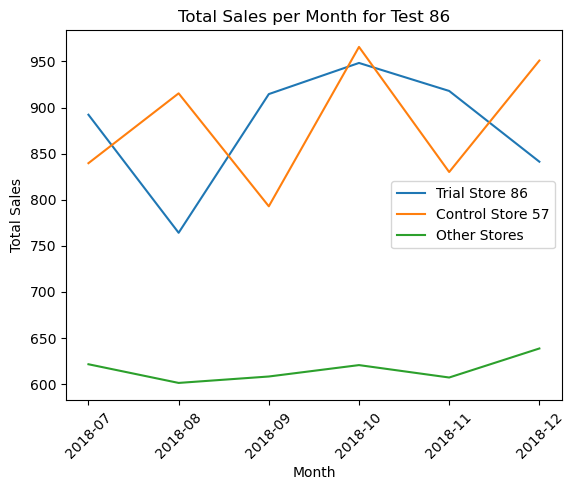

In [101]:
plt.plot(monthly_sales_86.index.astype(str), monthly_sales_86.values, label = 'Trial Store 86')
plt.plot(monthly_sales_57.index.astype(str), monthly_sales_57.values, label = 'Control Store 57')
plt.plot(other_store_sales.index.astype(str), other_store_sales.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Test 86')
plt.xticks(rotation=45)
plt.legend()
plt.show()

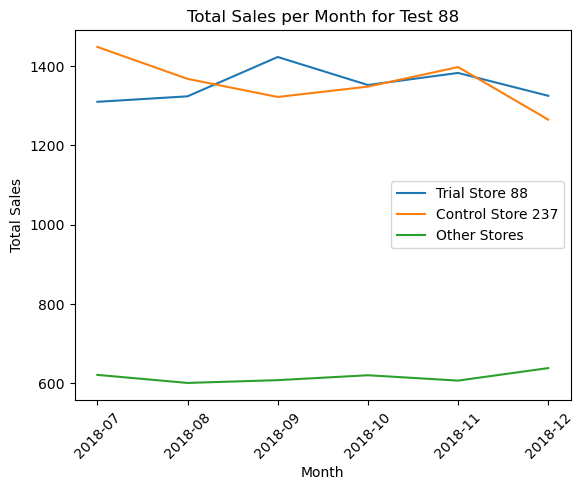

In [102]:
plt.plot(monthly_sales_88.index.astype(str), monthly_sales_88.values, label = 'Trial Store 88')
plt.plot(monthly_sales_237.index.astype(str), monthly_sales_237.values, label = 'Control Store 237')
plt.plot(other_store_sales.index.astype(str), other_store_sales.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Test 88')
plt.xticks(rotation=45)
plt.legend()
plt.show()

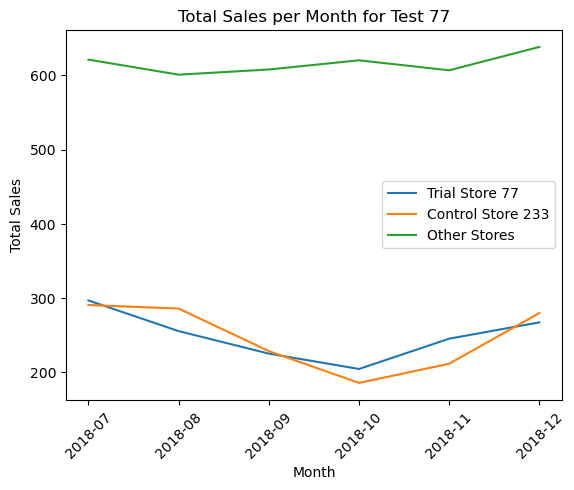

In [103]:
plt.plot(monthly_sales_77.index.astype(str), monthly_sales_77.values, label = 'Trial Store 77')
plt.plot(monthly_sales_233.index.astype(str), monthly_sales_233.values, label = 'Control Store 233')
plt.plot(other_store_sales.index.astype(str), other_store_sales.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Test 77')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Customers

In [104]:
monthly_cust_77 = ttl_cust_df.iloc[76]
monthly_cust_233 = ttl_cust_df.iloc[232] #72 #232

monthly_cust_86 = ttl_cust_df.iloc[85]
monthly_cust_57 = ttl_cust_df.iloc[56] #159 #236

monthly_cust_88 = ttl_cust_df.iloc[87]
monthly_cust_237 = ttl_cust_df.iloc[236] #39 #236


In [105]:
other_store_cust = ttl_cust_df.mean()
other_store_cust

DATE
7_ttl_cust     84.819549
8_ttl_cust     85.209125
9_ttl_cust     82.359848
10_ttl_cust    84.101887
11_ttl_cust    82.772727
12_ttl_cust    86.825095
dtype: float64

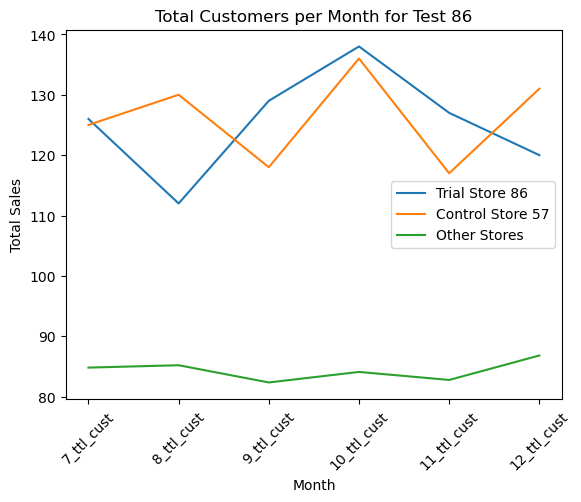

In [106]:
plt.plot(monthly_cust_86.index.astype(str), monthly_cust_86.values, label = 'Trial Store 86')
plt.plot(monthly_cust_57.index.astype(str), monthly_cust_57.values, label = 'Control Store 57')
plt.plot(other_store_cust.index.astype(str), other_store_cust.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Customers per Month for Test 86')
plt.xticks(rotation=45)
plt.legend()
plt.show()

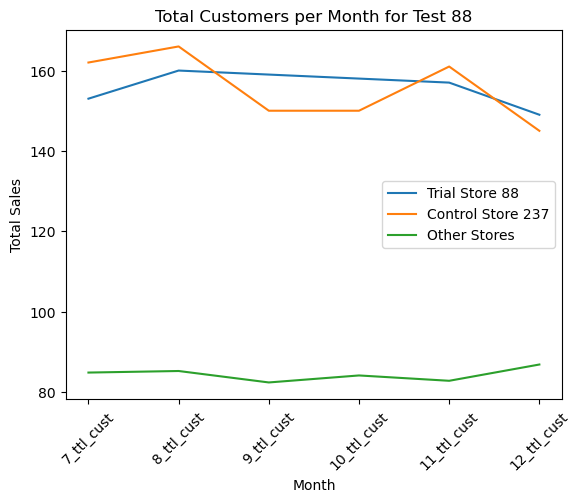

In [107]:
plt.plot(monthly_cust_88.index.astype(str), monthly_cust_88.values, label = 'Trial Store 88')
plt.plot(monthly_cust_237.index.astype(str), monthly_cust_237.values, label = 'Control Store 237')
plt.plot(other_store_cust.index.astype(str), other_store_cust.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Customers per Month for Test 88')
plt.xticks(rotation=45)
plt.legend()
plt.show()

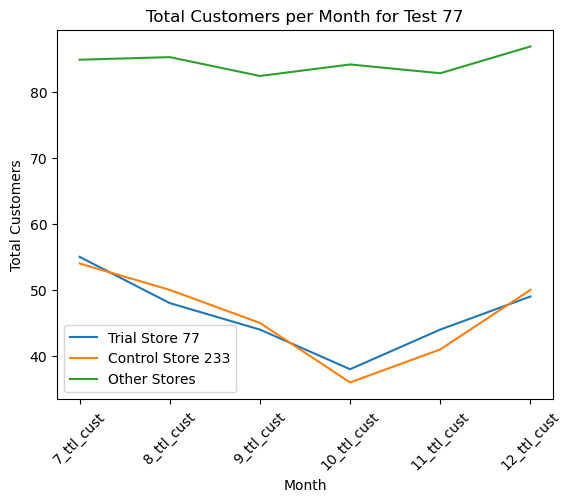

In [108]:
plt.plot(monthly_cust_77.index.astype(str), monthly_cust_77.values, label = 'Trial Store 77')
plt.plot(monthly_cust_233.index.astype(str), monthly_cust_233.values, label = 'Control Store 233')
plt.plot(other_store_cust.index.astype(str), other_store_cust.values, label = 'Other Stores')

plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.title('Total Customers per Month for Test 77')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- Now lets assess the performance of the trial stores

# Assessment of Trial: Trial 77
- Has there been an uplift in sales due to the new layouts in the trial stores

In [361]:
#Pre Trial Data
select_data = select_data.dropna()

In [362]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store
control_store_id = 233 #73
trial_store_id = 77

control_store_sales = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_sales = control_store_sales.groupby(control_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_sales = trial_store_sales.groupby(trial_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


In [363]:
#Data before the trial
#Want to see the overall trend of sales for a store
data_before_trial = data[data['DATE'] < '2019-03-01 00:00:00']

In [366]:
#Data after the trial period
data_after_trial = data[data['DATE'] >= '2019-04-01 00:00:00']

In [367]:
# Trial Data
trial_data = data[data['DATE'] >= '2019-02-01 00:00:00']
trial_data = trial_data[trial_data['DATE'] < '2019-05-01 00:00:00']

In [368]:
control_store_sales_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
#control_store_sales_during_trial['TOT_SALES'] = control_store_sales_during_trial['TOT_SALES']*scaling_fac
control_store_sales_during_trial =  control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_sales_during_trial = control_store_sales_during_trial #*scaling_fac
control_store_sales_during_trial

DATE
2019-02    244.0
2019-03    199.1
2019-04    158.6
Freq: M, Name: TOT_SALES, dtype: float64

In [369]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_sales =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_sales_month = trial_store_sales.groupby(trial_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales_month
#trial_store_sales_month = control_store_sales_during_trial.groupby(control_store_sales_during_trial['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

DATE
2019-02    235.0
2019-03    278.5
2019-04    263.5
Freq: M, Name: TOT_SALES, dtype: float64

In [370]:
percentageDiff = abs(control_store_sales_during_trial.sum() - trial_store_sales_month.sum()) / trial_store_sales_month.sum() * 100
percentageDiff

22.561132561132556

- is the % difference significant or not?

In [371]:
import scipy.stats as stats

In [372]:
trial_store_sales_month

DATE
2019-02    235.0
2019-03    278.5
2019-04    263.5
Freq: M, Name: TOT_SALES, dtype: float64

In [373]:
control_store_sales_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
control_store_sales_during_trial = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_sales_during_trial

DATE
2019-02    244.0
2019-03    199.1
2019-04    158.6
Freq: M, Name: TOT_SALES, dtype: float64

In [374]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(control_store_sales_during_trial, trial_store_sales_month) 

In [375]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -2.1043553466105163
P-Value: 0.10314505225726589


In [376]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.")
else:
    print("The percentage difference is not statistically significant.")

The percentage difference is not statistically significant.


- Insufficient evidence to reject the null hypothesis (that there is no difference). There is no strong enough evidence to confidently conclude that a significant difference or relationship exists.

In [377]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].mean()
control_store_CI_std = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].std()

In [378]:
control_upper_bound = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
#control_5_percentile = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI

In [379]:
control_upper_bound = control_store_sales_during_trial + control_upper_bound
#control_5_percentile = control_store_sales_during_trial + control_5_percentile|

In [380]:
#Data before the trial
#Want to see the overall trend of sales for a store
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_hist


DATE
2018-07    296.8
2018-08    255.5
2018-09    225.2
2018-10    204.5
2018-11    245.3
2018-12    267.3
2019-01    204.4
2019-02    235.0
Freq: M, Name: TOT_SALES, dtype: float64

In [381]:
control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_hist

DATE
2018-07    290.7
2018-08    285.9
2018-09    228.6
2018-10    185.7
2018-11    211.6
2018-12    279.8
2019-01    177.5
2019-02    244.0
Freq: M, Name: TOT_SALES, dtype: float64

In [382]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_fut


DATE
2019-04    263.5
2019-05    299.3
2019-06    264.7
Freq: M, Name: TOT_SALES, dtype: float64

In [383]:
control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_fut

DATE
2019-04    158.6
2019-05    344.4
2019-06    221.0
Freq: M, Name: TOT_SALES, dtype: float64

In [384]:
trial_store_sales_month

DATE
2019-02    235.0
2019-03    278.5
2019-04    263.5
Freq: M, Name: TOT_SALES, dtype: float64

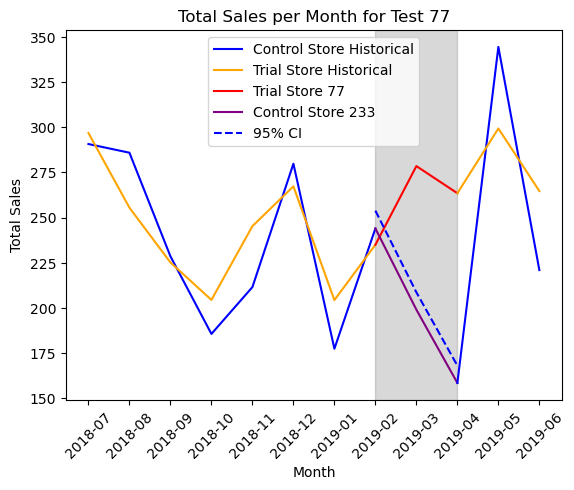

In [388]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical', color = 'blue')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical', color = 'orange')
plt.plot(trial_store_sales_month.index.astype(str), trial_store_sales_month.values, label = 'Trial Store 77', color = 'red')
plt.plot(control_store_sales_during_trial.index.astype(str), control_store_sales_during_trial.values, label = 'Control Store 233', color = 'purple')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')

plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')
#plt.plot(control_5_percentile.index.astype(str), control_5_percentile.values, linestyle='--', color='red', label='5% CI')

#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Test 77')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- Visually there is a significant difference between the control store and the trial store. Indicating the trial store had better performance in the trial months for at least 2 of the three mmonths. 

In [389]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store
control_store_id = 233
trial_store_id = 77

control_store_cust = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_cust = control_store_cust.groupby(control_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_cust = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


In [392]:
control_store_cust_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
control_store_cust_during_trial = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
control_store_cust_during_trial = control_store_cust_during_trial
control_store_cust_during_trial

DATE
2019-02    47
2019-03    41
2019-04    33
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [393]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_cust =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_cust_month = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust_month

DATE
2019-02    45
2019-03    55
2019-04    48
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [394]:
trial_store_cust['LYLTY_CARD_NBR'].value_counts().sum()

148

In [395]:
percentageDiff = abs(control_store_cust_during_trial.sum() - trial_store_cust_month.sum()) / trial_store_cust_month.sum() * 100
percentageDiff

18.243243243243242

- is the % difference significant or not?

In [396]:
import scipy.stats as stats

In [397]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(trial_store_cust_month,control_store_cust_during_trial) 

In [398]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.792052941319924
P-Value: 0.1475973761945953


In [399]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.") #Reject Null Hypoth
else:
    print("The percentage difference is not statistically significant.") #Cant reject Null Hypoth. No statisticall difference

The percentage difference is not statistically significant.


- THere is no statistically significant difference between the two stores. The observed difference is likely due to random chance. No strong evidence to reject the null hypothesis

In [400]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().mean()
control_store_CI_std = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().std()


In [401]:
control_upper_bound = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
#control_5_percentile = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI
control_upper_bound = control_store_cust_during_trial + control_upper_bound
#control_5_percentile = control_store_sales_during_trial + control_5_percentile|

In [402]:
#Data before the trial
#Want to see the overall trend of sales for a store
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()

control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()

In [405]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()

control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()

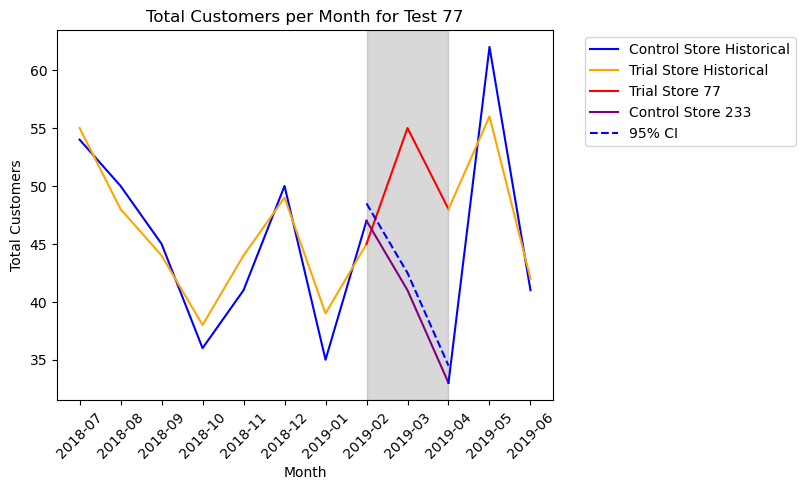

In [409]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical', color = 'blue')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical', color = 'orange')

plt.plot(trial_store_cust_month.index.astype(str), trial_store_cust_month.values, label = 'Trial Store 77', color = 'red')
plt.plot(control_store_cust_during_trial.index.astype(str), control_store_cust_during_trial.values, label = 'Control Store 233', color = 'purple')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')



plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')

#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.title('Total Customers per Month for Test 77')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- The total amount of customers also shows a signficiant difference, with the trial store outperforming the control store for majority of the trial months

# Assesment of Trial: Trial Store 86

In [410]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store
control_store_id = 57
trial_store_id = 86

control_store_sales = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_sales = control_store_sales.groupby(control_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_sales = trial_store_sales.groupby(trial_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


In [411]:
# scaling_fac = trial_store_sales.mean() / control_store_sales.mean()
# scaling_fac

In [412]:
#Scale the control stores sales during the trial period

In [413]:
# Trial Data
trial_data = data[data['DATE'] >= '2019-02-01 00:00:00']
trial_data = trial_data[trial_data['DATE'] < '2019-05-01 00:00:00']

In [414]:
control_store_sales_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
#control_store_sales_during_trial['TOT_SALES'] = control_store_sales_during_trial['TOT_SALES']*scaling_fac
control_store_sales_during_trial =  control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_sales_during_trial = control_store_sales_during_trial #*scaling_fac
control_store_sales_during_trial

DATE
2019-02    919.8
2019-03    807.4
2019-04    900.0
Freq: M, Name: TOT_SALES, dtype: float64

In [415]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_sales =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_sales_month = trial_store_sales.groupby(trial_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales_month
#trial_store_sales_month = control_store_sales_during_trial.groupby(control_store_sales_during_trial['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

DATE
2019-02     913.2
2019-03    1026.8
2019-04     848.2
Freq: M, Name: TOT_SALES, dtype: float64

In [416]:
# percentageDiff = abs(control_store_sales_during_trial.sum() - trial_store_sales_month.sum()) / trial_store_sales_month.sum() * 100
# percentageDiff

In [417]:
import scipy.stats as stats

In [418]:
trial_store_sales_month

DATE
2019-02     913.2
2019-03    1026.8
2019-04     848.2
Freq: M, Name: TOT_SALES, dtype: float64

In [419]:
control_store_sales_during_trial

DATE
2019-02    919.8
2019-03    807.4
2019-04    900.0
Freq: M, Name: TOT_SALES, dtype: float64

In [420]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(control_store_sales_during_trial, trial_store_sales_month) 

In [421]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.8567437480664455
P-Value: 0.4398801608725491


In [422]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.")
else:
    print("The percentage difference is not statistically significant.")

The percentage difference is not statistically significant.


- Insufficient evidence to reject the null hypothesis (that there is no difference). There is no strong enough evidence to confidently conclude that a significant difference or relationship exists.

In [423]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].mean()
control_store_CI_std = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].std()

In [424]:
control_upper_bound = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
#control_5_percentile = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI

control_upper_bound = control_store_sales_during_trial + control_upper_bound
#control_5_percentile = control_store_sales_during_trial + control_5_percentile|


In [425]:
#Data before the trial
#Want to see the overall trend of sales for a store
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


In [426]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


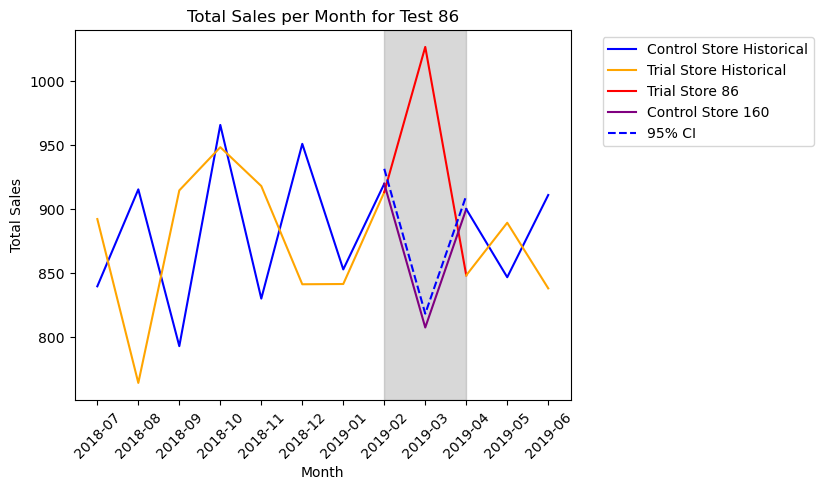

In [428]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical', color = 'blue')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical', color = 'orange')

plt.plot(trial_store_sales_month.index.astype(str), trial_store_sales_month.values, label = 'Trial Store 86', color = 'red')
plt.plot(control_store_sales_during_trial.index.astype(str), control_store_sales_during_trial.values, label = 'Control Store 160', color = 'purple')

plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')
#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)


plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Test 86')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Large difference only in 1 month, April. Trial store saw a significant increase in customers compared to Control store. Did Trial store do something differently?

In [429]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store

control_store_cust = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_cust = control_store_cust.groupby(control_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_cust = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


In [430]:
# scaling_fac = trial_store_cust.mean() / control_store_cust.mean()
# scaling_fac

In [431]:
control_store_cust_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
control_store_cust_during_trial = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
control_store_cust_during_trial = control_store_cust_during_trial #*scaling_fac
control_store_cust_during_trial

DATE
2019-02    130
2019-03    124
2019-04    139
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [432]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_cust =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_cust_month = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust_month

DATE
2019-02    139
2019-03    142
2019-04    127
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [433]:
trial_store_cust['LYLTY_CARD_NBR'].value_counts().sum()

408

In [434]:
# percentageDiff = abs(control_store_cust_during_trial.sum() - trial_store_cust_month.sum()) / trial_store_cust_month.sum() * 100
# percentageDiff

- is the % difference significant or not?

In [435]:
import scipy.stats as stats

In [436]:
trial_store_cust_month

DATE
2019-02    139
2019-03    142
2019-04    127
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [437]:
control_store_cust_during_trial

DATE
2019-02    130
2019-03    124
2019-04    139
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [438]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(trial_store_cust_month,control_store_cust_during_trial) 

In [439]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.7905694150420948
P-Value: 0.4734273652571376


In [440]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.")
else:
    print("The percentage difference is not statistically significant.")

The percentage difference is not statistically significant.


- THere is no statistically significant difference between the two stores. The observed difference is likely due to random chance. No strong evidence to reject the null hypothesis

In [441]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().mean()
control_store_CI_std = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().std()


In [442]:
control_upper_bound = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
#control_5_percentile = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI
control_upper_bound = control_store_cust_during_trial + control_upper_bound
#control_5_percentile = control_store_sales_during_trial + control_5_percentile|

In [443]:
#Data before the trial
#Want to see the overall trend of sales for a store
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()



In [444]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()

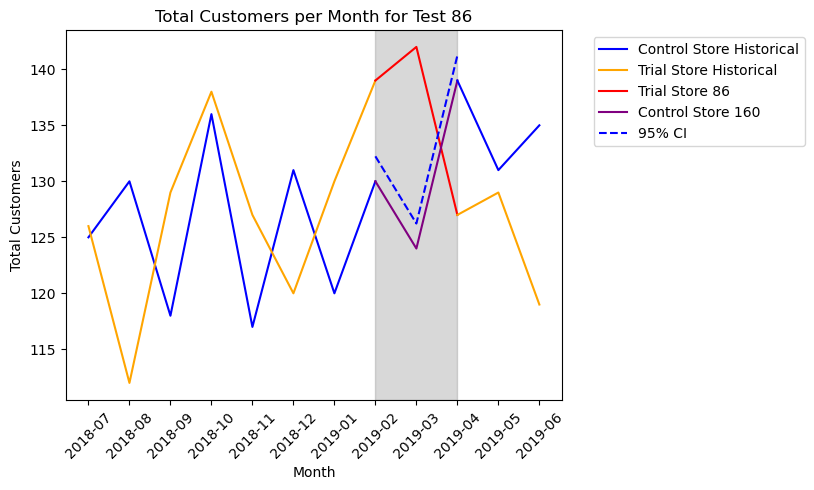

In [445]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical', color = 'blue')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical', color = 'orange')

plt.plot(trial_store_cust_month.index.astype(str), trial_store_cust_month.values, label = 'Trial Store 86', color = 'red')
plt.plot(control_store_cust_during_trial.index.astype(str), control_store_cust_during_trial.values, label = 'Control Store 160', color = 'purple')

plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')

#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.title('Total Customers per Month for Test 86')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Two of the three months see a significant increase in customers compared to control store. The Third month sees a steep decline of the trial store while the control store sees an increase.
- Need to look into why this is

# Assement of Trial: Trial 88

In [447]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store
control_store_id = 237
trial_store_id = 88

control_store_sales = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_sales = control_store_sales.groupby(control_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_sales = trial_store_sales.groupby(trial_store_sales['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


In [448]:
# Trial Data
trial_data = data[data['DATE'] >= '2019-02-01 00:00:00']
trial_data = trial_data[trial_data['DATE'] < '2019-05-01 00:00:00']

In [449]:
control_store_sales_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
#control_store_sales_during_trial['TOT_SALES'] = control_store_sales_during_trial['TOT_SALES']*scaling_fac
control_store_sales_during_trial =  control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_sales_during_trial = control_store_sales_during_trial#*scaling_fac
control_store_sales_during_trial

DATE
2019-02    1404.8
2019-03    1208.2
2019-04    1204.6
Freq: M, Name: TOT_SALES, dtype: float64

In [450]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].mean()
control_store_CI_std = control_store_sales_during_trial_df.groupby(control_store_sales_during_trial_df['DATE'].dt.to_period('M'))['TOT_SALES'].std()

In [451]:
control_upper_bound_ci = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
control_5_percentile_ci = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI

In [452]:
control_upper_bound = control_store_sales_during_trial + control_upper_bound_ci
control_5_percentile = control_store_sales_during_trial - control_5_percentile_ci

In [453]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_sales_df =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_sales_month = trial_store_sales_df.groupby(trial_store_sales_df['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_sales_month
#trial_store_sales_month = control_store_sales_during_trial.groupby(control_store_sales_during_trial['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

DATE
2019-02    1370.2
2019-03    1477.2
2019-04    1439.4
Freq: M, Name: TOT_SALES, dtype: float64

In [456]:
percentageDiff = abs(control_store_sales_during_trial.sum() - trial_store_sales_month.sum()) / trial_store_sales_month.sum() * 100
percentageDiff

10.945227209107031

- is the % difference significant or not?

In [457]:
import scipy.stats as stats

In [458]:
trial_store_sales_month

DATE
2019-02    1370.2
2019-03    1477.2
2019-04    1439.4
Freq: M, Name: TOT_SALES, dtype: float64

In [459]:
control_store_sales_during_trial

DATE
2019-02    1404.8
2019-03    1208.2
2019-04    1204.6
Freq: M, Name: TOT_SALES, dtype: float64

In [460]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(control_store_sales_during_trial, trial_store_sales_month) 

In [461]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -2.1370250720525052
P-Value: 0.09941957736359801


In [462]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.")
else:
    print("The percentage difference is not statistically significant.")

The percentage difference is not statistically significant.


- Sufficient evidence to reject the Null Hypothesis, there is sufficient evidence to support that there is a difference between the two groups
- for other control store

- InSufficient evidence to reject the Null Hypothesis, there is not sufficient evidence to support that there is a difference between the two groups

In [463]:
trial_store_sales

DATE
2018-07    1310.0
2018-08    1323.8
2018-09    1423.0
2018-10    1352.4
2018-11    1382.8
2018-12    1325.2
Freq: M, Name: TOT_SALES, dtype: float64

In [466]:
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_store_hist

DATE
2018-07    1310.0
2018-08    1323.8
2018-09    1423.0
2018-10    1352.4
2018-11    1382.8
2018-12    1325.2
2019-01    1266.4
2019-02    1370.2
Freq: M, Name: TOT_SALES, dtype: float64

In [467]:
control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_store_hist

DATE
2018-07    1448.4
2018-08    1367.8
2018-09    1322.2
2018-10    1348.3
2018-11    1397.6
2018-12    1265.0
2019-01    1219.7
2019-02    1404.8
Freq: M, Name: TOT_SALES, dtype: float64

In [468]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


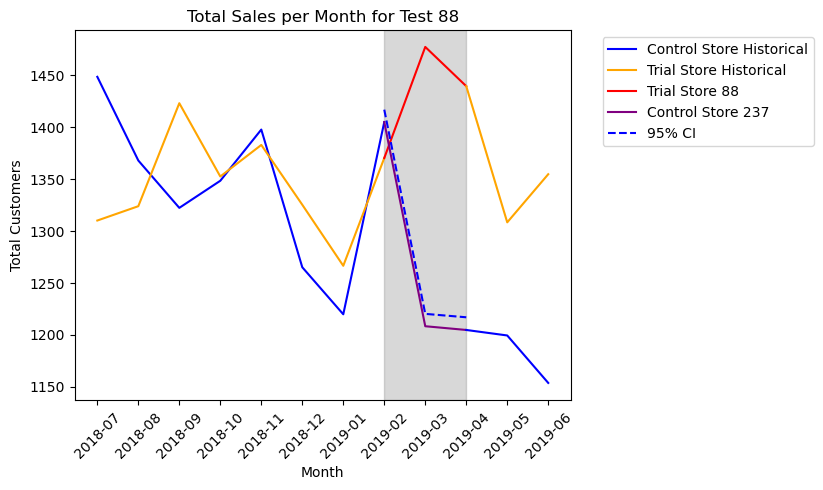

In [470]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical', color = 'blue')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical', color = 'orange')

plt.plot(trial_store_sales_month.index.astype(str), trial_store_sales_month.values, label = 'Trial Store 88', color = 'red')
plt.plot(control_store_sales_during_trial.index.astype(str), control_store_sales_during_trial.values, label = 'Control Store 237', color = 'purple')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')


plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')


#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.title('Total Sales per Month for Test 88')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Significant difference for at least 2 of the 3 months

In [471]:
# Getting Scaling Factor to account for differences between Pre-trial and during trial of the control store

control_store_cust = select_data[select_data['STORE_NBR'] == control_store_id]
control_store_cust = control_store_cust.groupby(control_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust = select_data[select_data['STORE_NBR'] == trial_store_id]
trial_store_cust = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


In [473]:
control_store_cust_during_trial_df = trial_data[trial_data['STORE_NBR'] == control_store_id]
control_store_cust_during_trial = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
control_store_cust_during_trial = control_store_cust_during_trial #*scaling_fac
control_store_cust_during_trial

DATE
2019-02    157
2019-03    137
2019-04    136
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [474]:
#Calculate the % difference between the scaled control sales and the trial stores sales during trial period
trial_store_cust =  trial_data[trial_data['STORE_NBR'] == trial_store_id]
trial_store_cust_month = trial_store_cust.groupby(trial_store_cust['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_cust_month

DATE
2019-02    154
2019-03    170
2019-04    162
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [476]:
percentageDiff = abs(control_store_cust_during_trial.sum() - trial_store_cust_month.sum()) / trial_store_cust_month.sum() * 100
percentageDiff

11.522633744855968

In [477]:
import scipy.stats as stats

In [478]:
trial_store_cust_month

DATE
2019-02    154
2019-03    170
2019-04    162
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [479]:
control_store_cust_during_trial

DATE
2019-02    157
2019-03    137
2019-04    136
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [480]:
#Calculate %
t_statistic, p_value = stats.ttest_ind(trial_store_cust_month,control_store_cust_during_trial) 

In [481]:
# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 2.261818696821653
P-Value: 0.08650629257296417


In [482]:
if p_value < 0.05:
    print("The percentage difference is statistically significant.")
else:
    print("The percentage difference is not statistically significant.")

The percentage difference is not statistically significant.


- Sufficient evidence to reject the Null Hypothesis, there is sufficient evidence to support that there is a difference between the two groups

- Insufficient evidence to reject the Null Hypothesis, there is insufficient evidence to support that there is a difference between the two groups

In [483]:
#Control Store Confidence Intervals
control_store_CI_mean = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().mean()
control_store_CI_std = control_store_cust_during_trial_df.groupby(control_store_cust_during_trial_df['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].value_counts().std()


In [484]:
control_upper_bound = control_store_CI_mean + 1.96 * control_store_CI_std  # 95% CI upper bound
#control_5_percentile = control_store_CI_mean - 1.645 * control_store_CI_std # 5% CI
control_upper_bound = control_store_cust_during_trial + control_upper_bound
#control_5_percentile = control_store_sales_during_trial + control_5_percentile|

In [485]:
#Data before the trial
#Want to see the overall trend of sales for a store
trial_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == trial_store_id]
trial_store_hist = trial_store_hist.groupby(trial_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
trial_store_hist

DATE
2018-07    153
2018-08    160
2018-09    159
2018-10    158
2018-11    157
2018-12    149
2019-01    146
2019-02    154
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [486]:
control_store_hist = data_before_trial[data_before_trial['STORE_NBR'] == control_store_id]
control_store_hist = control_store_hist.groupby(control_store_hist['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()
control_store_hist

DATE
2018-07    162
2018-08    166
2018-09    150
2018-10    150
2018-11    161
2018-12    145
2019-01    139
2019-02    157
Freq: M, Name: LYLTY_CARD_NBR, dtype: int64

In [487]:
#Data After the trial
#Want to see the overall trend of sales for a store
trial_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == trial_store_id]
trial_store_fut = trial_store_fut.groupby(trial_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


control_store_fut = data_after_trial[data_after_trial['STORE_NBR'] == control_store_id]
control_store_fut = control_store_fut.groupby(control_store_fut['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].size()


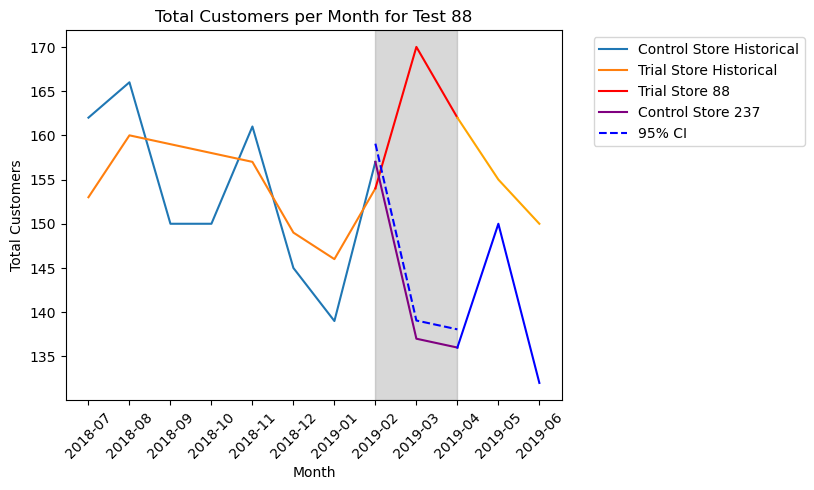

In [488]:
plt.plot(control_store_hist.index.astype(str), control_store_hist.values, label = 'Control Store Historical')
plt.plot(trial_store_hist.index.astype(str), trial_store_hist.values, label = 'Trial Store Historical')

plt.plot(trial_store_cust_month.index.astype(str), trial_store_cust_month.values, label = 'Trial Store 88', color = 'red')
plt.plot(control_store_cust_during_trial.index.astype(str), control_store_cust_during_trial.values, label = 'Control Store 237', color = 'purple')

plt.plot(control_store_fut.index.astype(str), control_store_fut.values,color = 'blue')
plt.plot(trial_store_fut.index.astype(str), trial_store_fut.values, color = 'orange')


plt.plot(control_upper_bound.index.astype(str), control_upper_bound.values, linestyle='--', color='blue', label='95% CI')

#Shaded area of Trial Months
#add rectangle to plot
plt.axvspan(7, 9, color='gray', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.title('Total Customers per Month for Test 88')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conclusion

- We have found control stores for each of the trial stores and evaluated how well the stores performed with the changes. Control stores 233, 57 and 237 for trial stores 77, 86 and 88 respectively. The results for Trial 77 and 88 during the trial period show a signficiant difference in at least 2 of the three trials months, but this wasnt the case for Trial 86. It is important to check what differences Trial 86 had compared to the other trial store runs. Overall, the trial shows an increase in sales. 